In [1]:
import pymaid
import navis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from matplotlib.ticker import PercentFormatter
from statannot import add_stat_annotation

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#initialize an empty dataframe
glomcontrol=pd.DataFrame(columns=['glomerulus', 'id', 'path length in glom', 'total feedforward connections', 'feedforward connections in glom', 'feedforward connections density'])

In [4]:
#fetch a group of neurons
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)
#print(neurons)

Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
#get all feedforward connectivity
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets="MD1 uPN")
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD1 04/06/21')
    connect= list(connectivity.loc[int(n.id),:])
    glomconnect=list(glom_connectivity.loc[n.id,:])

    #divide connectivity by length within glomerulus
    control= glomconnect/(dlength*1000)
    glomcontrol=glomcontrol.append({'glomerulus':'md1', 'id':int(n.id),'path length in glom':dlength, 'total feedforward connections':connect, 'feedforward connections in glom':glomconnect, 'feedforward connections density':control}, ignore_index=True)

453680.44


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


406781.8


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


569447.6


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


445835.0


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


506129.03


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


391274.1


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


416095.0


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


529455.4


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


284735.88


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


629597.1


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#fetch a group of neurons
MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2neurons = pymaid.get_neuron(MD2OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
#get all feedforward connectivity
for n in MD2neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets="690")
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD2 2022')
    connect= list(connectivity.loc[int(n.id),:])
    glomconnect=list(glom_connectivity.loc[n.id,:])

    #divide connectivity by length within glomerulus
    control= glomconnect/(dlength*1000)
    glomcontrol=glomcontrol.append({'glomerulus':'md2', 'id':int(n.id),'path length in glom':dlength, 'total feedforward connections':connect, 'feedforward connections in glom':glomconnect, 'feedforward connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


204651.92


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


139823.97


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138637.03


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


151320.84


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


165390.64


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


139452.69


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


101146.766


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


190179.62


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


161357.25


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167272.23


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#fetch a group of neurons
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3neurons = pymaid.get_neuron(MD3OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
#get all feedforward connectivity
for n in MD3neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets="11126")
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD3 2022')
    connect= list(connectivity.loc[int(n.id),:])
    glomconnect=list(glom_connectivity.loc[n.id,:])

    #divide connectivity by length within glomerulus
    control= glomconnect/(dlength*1000)
    glomcontrol=glomcontrol.append({'glomerulus':'md3', 'id':int(n.id),'path length in glom':dlength, 'total feedforward connections':connect, 'feedforward connections in glom':glomconnect, 'feedforward connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


170278.0


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


150266.17


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


155520.5


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


187113.31


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


133549.25


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


137935.17


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


108313.91


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


143697.12


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


107448.984


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


122648.234


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
print(glomcontrol)

   glomerulus      id  path length in glom total feedforward connections  \
0         md1    7172        453680.437500                         [147]   
1         md1    7815        406781.812500                         [157]   
2         md1     873        569447.625000                         [111]   
3         md1    6736        445835.000000                         [100]   
4         md1     881        506129.031250                         [137]   
5         md1    6975        391274.093750                         [139]   
6         md1  324409        416095.000000                         [171]   
7         md1     953        529455.375000                         [142]   
8         md1    5021        284735.875000                          [80]   
9         md1     671        629597.125000                         [126]   
10        md2    9064        204651.921875                          [94]   
11        md2    7209        139823.968750                          [88]   
12        md

In [11]:
df=glomcontrol #lol

In [12]:
md1=df[df["glomerulus"]=="md1"]
md2=df[df["glomerulus"]=="md2"]
md3=df[df['glomerulus']=="md3"]
md1.head()

,glomerulus,id,path length in glom,total feedforward connections,feedforward connections in glom,feedforward connections density
0,md1,7172,453680.43750,[147],[147.0],[3.2401661577043424e-07]
1,md1,7815,406781.81250,[157],[155.0],[3.810396513241358e-07]
2,md1,873,569447.62500,[111],[108.0],[1.8965747727896837e-07]
3,md1,6736,445835.00000,[100],[100.0],[2.2429822692251617e-07]
4,md1,881,506129.03125,[137],[133.0],[2.627788405488744e-07]


In [13]:
#make lists like a noob
md1_feedforward_inglom=md1["feedforward connections in glom"].values.tolist()
md1_feedforward_inglom=list(np.concatenate(md1_feedforward_inglom))

md2_feedforward_inglom=md2["feedforward connections in glom"].values.tolist()
md2_feedforward_inglom=list(np.concatenate(md2_feedforward_inglom))

md3_feedforward_inglom=md3["feedforward connections in glom"].values.tolist()
md3_feedforward_inglom=list(np.concatenate(md3_feedforward_inglom))

print(md3_feedforward_inglom)

[146.0, 110.0, 96.0, 160.0, 117.0, 115.0, 135.0, 126.0, 119.0, 105.0]


In [25]:
stats.kruskal(md1_feedforward_inglom, md3_feedforward_inglom, md2_feedforward_inglom)

KruskalResult(statistic=16.45011125945706, pvalue=0.00026785744791621284)

In [14]:
#make dataframe

data_dict = {"1": md1_feedforward_inglom, "2": md2_feedforward_inglom, "3": md3_feedforward_inglom}
pre_df = {"Glomerulus": [], "OSN → uPN synapses in glomerulus": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses in glomerulus"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → uPN synapses in glomerulus
0,1,147.0
1,1,155.0
2,1,108.0
3,1,100.0
4,1,133.0
5,1,139.0
6,1,168.0
7,1,130.0
8,1,80.0
9,1,118.0


In [15]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.928e-03 U_stat=9.300e+01


/tmp/ipykernel_37718/560932190.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.344e-04 U_stat=1.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.800e+01


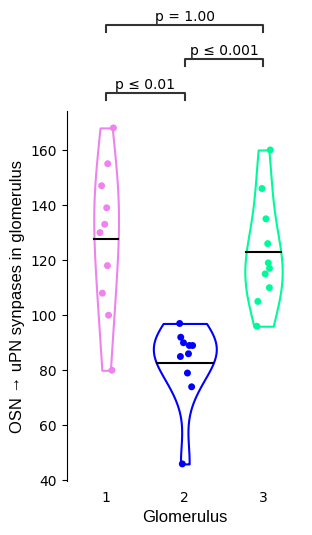

In [16]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → uPN synapses in glomerulus"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('OSN → uPN synpases in glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(0.035)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("2", "3"), ("1", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/feedforward.svg', format="svg")
plt.show()

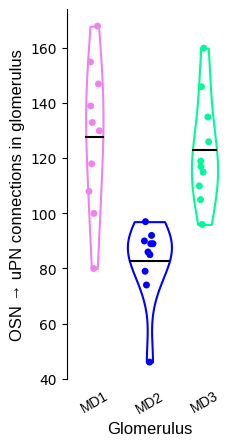

In [17]:
ax = my_violinplot2(data=[md1_feedforward_inglom, md2_feedforward_inglom, md3_feedforward_inglom], color="1")
ax = sns.stripplot(data=[md1_feedforward_inglom, md2_feedforward_inglom, md3_feedforward_inglom], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['MD1', 'MD2', 'MD3']
ax.set_ylabel('OSN → uPN connections in glomerulus', size=12, fontname="Liberation Sans")
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(0.05)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_xticklabels(labels,rotation = 30, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/feedforwardinglom.svg', format="svg")

In [18]:
#make lists like a noob
md1_feedforward_density=md1["feedforward connections density"].values.tolist()
md1_feedforward_density=list(np.concatenate(md1_feedforward_density))

md2_feedforward_density=md2["feedforward connections density"].values.tolist()
md2_feedforward_density=list(np.concatenate(md2_feedforward_density))

md3_feedforward_density=md3["feedforward connections density"].values.tolist()
md3_feedforward_density=list(np.concatenate(md3_feedforward_density))

In [23]:
#make dataframe

data_dict = {"1": md1_feedforward_density, "2": md2_feedforward_density, "3": md3_feedforward_density}
pre_df = {"Glomerulus": [], "OSN → uPN synapses density": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses density"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → uPN synapses density
0,1,3.240166e-07
1,1,3.810397e-07
2,1,1.896575e-07
3,1,2.242982e-07
4,1,2.627788e-07
5,1,3.552497e-07
6,1,4.037540e-07
7,1,2.455353e-07
8,1,2.809621e-07
9,1,1.874214e-07


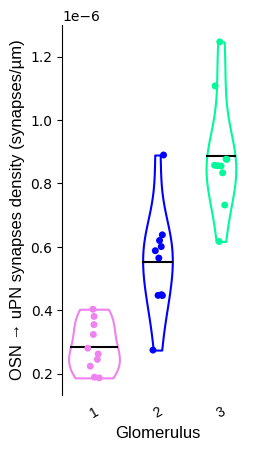

In [20]:
ax = my_violinplot2(data=[md1_feedforward_density, md2_feedforward_density, md3_feedforward_density], color="1")
ax = sns.stripplot(data=[md1_feedforward_density, md2_feedforward_density, md3_feedforward_density], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['1', '2', '3']
ax.set_ylabel('OSN → uPN synapses density (synapses/µm)', size=12, fontname="Liberation Sans")
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(5000000)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_xticklabels(labels,rotation = 30, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/feedforwardinglom_density.svg', format="svg")

In [26]:
stats.kruskal(md1_feedforward_density, md2_feedforward_density, md3_feedforward_density)

KruskalResult(statistic=22.129032258064512, pvalue=1.5658195106883644e-05)

/tmp/ipykernel_37718/480978872.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.306e-03 U_stat=5.000e+00
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.482e-03 U_stat=1.000e+01
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.480e-04 U_stat=0.000e+00


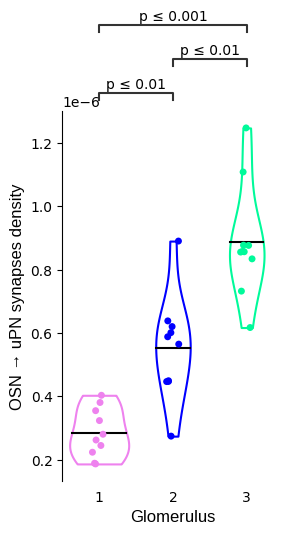

In [24]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → uPN synapses density"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('OSN → uPN synapses density', size=12, fontname="Liberation Sans")
ax.set_aspect(4300000)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("2", "3"), ("1", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/feedforward_density.svg', format="svg")
plt.show()